We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze clients behavior and determine which prepaid plan brings in more revenue.

# Overview and studying the general information

Importing all the necessaries libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Importing all the necesaries files

In [2]:
try:
    data_calls = pd.read_csv('megaline_calls.csv')
    data_internet = pd.read_csv('megaline_internet.csv')
    data_messages = pd.read_csv('megaline_messages.csv')
    data_plans = pd.read_csv('megaline_plans.csv')
    data_users = pd.read_csv('megaline_users.csv')
except:
    data_users = pd.read_csv ('/datasets/megaline_users.csv')
    data_plans = pd.read_csv ('/datasets/megaline_plans.csv')
    data_calls = pd.read_csv ('/datasets/megaline_calls.csv')
    data_messages = pd.read_csv ('/datasets/megaline_messages.csv')
    data_internet = pd.read_csv ('/datasets/megaline_internet.csv')

In [3]:
#Print the first rows from the table using the head() method.
display(data_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
#Print the first rows from the table using the head() method.
display(data_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
#Print the first rows from the table using the head() method.
display(data_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
#Print the table.
display(data_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
#Print the first rows from the table using the head() method.
display(data_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


# Preparing the data

### Checking for missing values 
Let's look for missing values in the next tables : 

*. data_calls
*. data_internet 
*. data_messages 
*. data_users
*. data_plans

In [8]:
dict = {'data_calls':data_calls,'data_internet':data_internet, 'data_messages':data_messages, 'data_plans':data_plans, 'data_users':data_users }

for data in dict:
    print(data,'table - using info()method')
    print()
    display(dict[data].info())
    print('#Lets look for missing values')
    display(dict[data].isnull().sum())
    print()
    print()   

data_calls table - using info()method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

#Lets look for missing values


id           0
user_id      0
call_date    0
duration     0
dtype: int64



data_internet table - using info()method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

#Lets look for missing values


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64



data_messages table - using info()method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

#Lets look for missing values


id              0
user_id         0
message_date    0
dtype: int64



data_plans table - using info()method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

#Lets look for missing values


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64



data_users table - using info()method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

#Lets look for missing values


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

#### In the table data_users we have missing values for the churn_date column. 

The description of this column is : the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved. 

So, we can conclude that all the users were using the service at the times the data was collected. For this reason, these are not missin values. And we don't need to fill these missing values, maybe we can change there data type. Let's continue working on the data, and if we feel the data type change for the churn_date column is necesary we will make it.
Looks good! There is not missing values 


#### The dates in all the tables's columns are a object type
Maybe we should change the data type for these columns to date type

#### Excluding the churn_date column there are  no missing values
Looks good! No missing values in our tables, we can continue with the data pre-processing

### Now let's check if there are weird values. 

#### Let's check what about the zeros in the duration and mb_used columns.

data_calls table --> duration column — call duration (in minutes)

data_internet --> mb_used - the volume of data spent during the session (in megabytes)

Why? We maybe expect from the users to use the internet at less for a few times every month, and the durations call to be greater than 0 minutos.

In [9]:
#count() method to check counts of zeros in the duration column
print('Counts of ceros in the duration column - data_calls table')
print(data_calls[data_calls['duration'] == 0].count())
print()
#count() method to check counts of zeros in the mb_used column
print('Counts of ceros in the mb_used column - data_internet table')
print(data_internet[data_internet['mb_used']== 0].count())

Counts of ceros in the duration column - data_calls table
id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

Counts of ceros in the mb_used column - data_internet table
id              13747
user_id         13747
session_date    13747
mb_used         13747
dtype: int64


Let's see how much this is percentage:

In [10]:
#calculating the percentahe of values equals to cero in the columns
print('Percentage of rows with durations calls equals to zero seconds:',data_calls[data_calls['duration'] == 0]['id'].count()*100/len(data_calls))
print()
print('Percentage of row with volume values of data spent equals to zero:',data_internet[data_internet['mb_used'] == 0]['id'].count()*100/len(data_internet))


Percentage of rows with durations calls equals to zero seconds: 19.48233927469416

Percentage of row with volume values of data spent equals to zero: 13.11423801574052


These percentage are really high, and it's obvious that we can't just delete all these rows. Also, they are not critical high. If the percentage of values that are equals to zero was 50% or more was really weird. But this is not the case. It's logical that 19,48% of calls were zero seconds,all these can be missing calls. And we should have clients that don't use they internet so much, for example clients from the golds ages(80+ ages) or just clients that didn't spend data during a specific session. 
To be sure that there is not something weird here let's print the counts of the value counts of user_id only for rows where the values equals to zero. If we find out that all these zeros come from just a few clients them we can say that there is something strange (maybe). 

Let's check!

In [11]:
print('Number of users in data_calls table with durations calls equal to cero:',data_calls[data_calls['duration'] == 0]['user_id'].value_counts().count())
print('Number of users in data_internet table with values of data spent equals to cero:',data_internet[data_internet['mb_used']==0]['user_id'].value_counts().count())

Number of users in data_calls table with durations calls equal to cero: 478
Number of users in data_internet table with values of data spent equals to cero: 477


Looks good! We have the data on 500 Megaline clients, and it's logical that almost all of them make calls that are not answered and have sessions in where they don't spent data.

### Looking for duplicate values 

In [12]:
dict = {'data_calls':data_calls,'data_internet':data_internet, 'data_messages':data_messages, 'data_plans':data_plans, 'data_users':data_users }
for data in dict :
    print('Duplicates in {} table: {}'.format(data,dict[data].duplicated().sum()))

Duplicates in data_calls table: 0
Duplicates in data_internet table: 0
Duplicates in data_messages table: 0
Duplicates in data_plans table: 0
Duplicates in data_users table: 0


There are no duplicates! We can continue working.

### Converting the data to the necessary types
The type of the dates values are object. Will use to_datetime() method to change the types.
{format = '%Y-%m-%d'}

In [13]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

We finish with the data pre-processing!

The next step will be to organize the data in order to analizage all we have in an easier way. 

# Organizing the data

#### For each user, we will find:
* The number of calls made and minutes used per month

* The number of text messages sent per month

* The volume of data per month

* The monthly revenue from each user 

### The number of calls made and minutes used per month

**Note:** Megaline rounds seconds up to minutes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 
Let's round our minutes!

In [14]:
# round our minutes 
data_calls['duration'] = np.ceil(data_calls['duration'])

In [15]:
#Add a month column to the data_calls column
data_calls['month'] = data_calls['call_date'].dt.month

In [16]:
#Making a pivot table with the number of calls made and minutes used per month for each user_id
data_month_calls = data_calls.pivot_table(index=['user_id','month'], values = 'duration', aggfunc=['count','sum'])
data_month_calls.columns = data_month_calls.columns.droplevel(1)
data_month_calls.columns = ['total calls', 'total minutes'] 
data_month_calls.reset_index(inplace=True)

#Let's change the data type in the column total minutes to int
data_month_calls['total minutes'] = data_month_calls['total minutes'].astype(int)

In [17]:
#Let's take a look!
display(data_month_calls.head())

,user_id,month,total calls,total minutes
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


### The number of text messages sent per month

In [18]:
#Add a month column to the data_messages column
data_messages['month'] = data_messages['message_date'].dt.month

In [19]:
#Making a pivot table with the number of number of text messages sent per month for each user_id
data_month_messages = data_messages.pivot_table(index=['user_id','month'], values = 'message_date', aggfunc=['count'])
data_month_messages.columns = data_month_messages.columns.droplevel(1)
data_month_messages.columns = ['total messages'] 
data_month_messages.reset_index(inplace=True)

#Let's take a look!
display(data_month_messages.head())

,user_id,month,total messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


### The volume of data per month

In [20]:
#Add a month column to the data_messages column
data_internet['month'] = data_internet['session_date'].dt.month
#let's take a look
display(data_internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [21]:
#Making a pivot table with the volumen of data spent per month for each user_id
data_month_internet = data_internet.pivot_table(index=['user_id','month'], values = 'mb_used', aggfunc=['sum'])
data_month_internet.columns = data_month_internet.columns.droplevel(1)
data_month_internet.columns = ['total mb_used'] 
data_month_internet.reset_index(inplace=True)

#let's take a look
display(data_month_internet.head())

,user_id,month,total mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


**Note:** For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [22]:
# Add a new column to data_month_internet table with round our megabytes to gigabytes
data_month_internet['total gigabytes'] = np.ceil(data_month_internet['total mb_used'] * 0.001)
#Let's change the data type in the column gigabytes to int
data_month_internet['total gigabytes'] = data_month_internet['total gigabytes'].astype(int)

In [23]:
#Let's take a look!
display(data_month_internet.head())

,user_id,month,total mb_used,total gigabytes
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,23
4,1001,11,18504.30,19


Perfect! We round up the megabytes. Not good for the client, but good for Megaline!

### Let's put all the relevant data in the same table

In [24]:
# create a new data frame starting with all users
# merging tables in 2 steps
data_revenues0 = pd.merge(left = data_month_calls , 
                right = data_month_internet, how='outer',on=['user_id', 'month']).fillna(0)

data_revenues1 = pd.merge(left = data_revenues0 , 
                right = data_month_messages, how='outer',on=['user_id', 'month']).fillna(0)

In [25]:
#Let's change the data type in the columns total gigabytes and  total messages to int
data_revenues1['total gigabytes'] = data_revenues1['total gigabytes'].astype(int)
data_revenues1['total messages'] = data_revenues1['total messages'].astype(int)

In [26]:
#Let's take a look on the first 5 rows!
display(data_revenues1.head(5))

,user_id,month,total calls,total minutes,total mb_used,total gigabytes,total messages
0,1000,12,16.0,124.0,1901.47,2,11
1,1001,8,27.0,182.0,6919.15,7,30
2,1001,9,49.0,315.0,13314.82,14,44
3,1001,10,65.0,393.0,22330.49,23,53
4,1001,11,64.0,426.0,18504.30,19,36


In [27]:
#Let's take a look on the last 5 rows!
display(data_revenues1.tail(5))

,user_id,month,total calls,total minutes,total mb_used,total gigabytes,total messages
2288,1349,10,0.0,0.0,13093.55,14,76
2289,1349,11,0.0,0.0,17128.26,18,72
2290,1349,12,0.0,0.0,13039.91,14,61
2291,1361,5,0.0,0.0,1519.69,2,2
2292,1482,10,0.0,0.0,0.00,0,2


Now let's add the name of the plan that each user is using, this will help us later to calculate the monthly revenue from each user.

In [28]:
#Using loc to make a new table only with the user_id and plan to each user_id
users_and_plans =  data_users.loc[:, ['user_id','plan']]
#Let's check the last user_id we have
users_and_plans.tail()

,user_id,plan
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf
499,1499,surf


Now it's time to make the last merge! 

merge() inner join  will discard only those rows that do not match.That's importan! We only want to use the data from the 500 clients we got in the data_users table, we want to work only with that clientes and in that way we can always come back to that table for referens and know from way we took the data. It's important to be organised!

In [29]:
# merging tables for the last time! 
data_revenues = pd.merge(left = data_revenues1, 
                right = users_and_plans , how='inner', on=['user_id']).fillna(0)

#Change month type from float64 to type int32	Integer (-2147483648 to 2147483647)
data_revenues['month'] = data_revenues['month'].astype("int32")

#let's check thats everthing looks good!
display(data_revenues.head())

,user_id,month,total calls,total minutes,total mb_used,total gigabytes,total messages,plan
0,1000,12,16.0,124.0,1901.47,2,11,ultimate
1,1001,8,27.0,182.0,6919.15,7,30,surf
2,1001,9,49.0,315.0,13314.82,14,44,surf
3,1001,10,65.0,393.0,22330.49,23,53,surf
4,1001,11,64.0,426.0,18504.30,19,36,surf


Almost there! Now we need to calculate the total cost and add the respective column to our table.

### Calculating the monthly revenue from each user 

We will calculate the monthly revenue from each user and add a column with this values. The name of the column will be total_cost.

In [30]:
def cost(row): 
    plan = row['plan']
    minutes = row['total minutes']
    message= row['total messages']
    GB = row['total gigabytes']
    
    if plan == 'surf' :
        monthly_charge = 20.0
        if minutes > 500.0 :
            cost_minutes = 0.3 * (minutes-500)
        else :
            cost_minutes = 0.0
        if message > 50.0 :
            cost_message = 0.3 * (message-50)
        else :
            cost_message = 0.0       
        if GB > 15.0 :
            cost_GB = 10.0 * (GB-15)
        else :
            cost_GB = 0.0      
    else :
        monthly_charge = 70.0
        if minutes > 3000.0 :
            cost_minutes = 0.1 * (minutes-3000)
        else :
            cost_minutes = 0.0
        if message > 1000.0 :
            cost_message = 0.1 * (message-1000)
        else :
            cost_message = 0.0        
        if GB > 30.0 :
            cost_GB = 7.0 * (GB-30)
        else :
            cost_GB = 0.0    
    return monthly_charge+cost_minutes+cost_message+cost_GB      

#Ussing apply()method to use the cost funtion
data_revenues['total_cost'] = data_revenues.apply(cost, axis=1)

In [31]:
#Let's take a look at our final table!
display(data_revenues.head())

,user_id,month,total calls,total minutes,total mb_used,total gigabytes,total messages,plan,total_cost
0,1000,12,16.0,124.0,1901.47,2,11,ultimate,70.0
1,1001,8,27.0,182.0,6919.15,7,30,surf,20.0
2,1001,9,49.0,315.0,13314.82,14,44,surf,20.0
3,1001,10,65.0,393.0,22330.49,23,53,surf,100.9
4,1001,11,64.0,426.0,18504.30,19,36,surf,60.0


# Analyzing the data

We are ready to describe the customers' behavior. How will we do it?
1. We will find the minutes, texts, and volume of data the users of each plan require per month. 
2. We will calculate the mean, dispersion, and standard deviation. 
3. We will plot histograms that will helps us to describe the distributions.

### Calculating the minutes, texts, and volume of data the users of each plan require per month

In [32]:
#creating a pivot table grouped by plan and months and calculating the means values
mean_per_month = (
    data_revenues
    .pivot_table(index = ['plan','month'], values = ['total minutes','total messages','total gigabytes','total_cost']))
#Eliminate the multilevel index
mean_per_month.reset_index(inplace=True)
# Fast look!
display(mean_per_month.head())

,plan,month,total gigabytes,total messages,total minutes,total_cost
0,surf,1,5.000000,10.500000,203.000000,20.000000
1,surf,2,12.666667,12.000000,297.000000,47.300000
2,surf,3,13.782609,15.260870,330.000000,54.630435
3,surf,4,12.420000,17.400000,351.540000,52.106000
4,surf,5,14.454545,24.012987,399.584416,66.151948


In [33]:
# print the values for the surf plan so we can take a closer look
display(mean_per_month.query('plan == "surf"'))

,plan,month,total gigabytes,total messages,total minutes,total_cost
0,surf,1,5.000000,10.500000,203.000000,20.000000
1,surf,2,12.666667,12.000000,297.000000,47.300000
2,surf,3,13.782609,15.260870,330.000000,54.630435
3,surf,4,12.420000,17.400000,351.540000,52.106000
4,surf,5,14.454545,24.012987,399.584416,66.151948
5,surf,6,15.762887,25.298969,431.298969,67.092784
6,surf,7,17.297521,27.033058,449.983471,87.319008
7,surf,8,17.253086,28.777778,410.111111,83.632716
8,surf,9,17.072165,30.762887,414.226804,75.704639
9,surf,10,17.772152,33.839662,429.729958,86.575105


Important! We can note that for the surf plan the values increise through the year! Maybe because more users subscribe for that plan through the year? Let's check!

In [34]:
#creating the monthly_users to see monthly users per plan surf
monthly_users_surf =  data_revenues.query('plan == "surf"').groupby(['plan','month']).agg({'user_id': 'count'}).reset_index()
#Fast look!
display(monthly_users_surf.head())

,plan,month,user_id
0,surf,1,2
1,surf,2,9
2,surf,3,23
3,surf,4,50
4,surf,5,77


Okay! Let's look at this with the help of a graph!

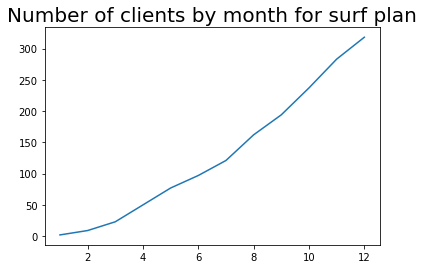

In [35]:
xa = monthly_users_surf['month']
ya = monthly_users_surf['user_id']
plt.plot(xa, ya)
plt.title('Number of clients by month for surf plan',fontsize=20)
plt.show()

We were right! More people subscribed through the year to the surf plan. 

This could means that the plan became more and more popular. 

Also important! we are calculating here the means of the columns : total gigabytes, total messages, total minutes and total_cost. And we see how the values for all these columns rise through the year. So we can conclude that is not only the new clients subscriptions, the clients also spent in average more gigabytes, messages and minutes throught the year ,and for that reason also the total_cost rise through the year. This means that we have more clients and more spends of minutes,internet and messages through the year.

After January, the average of the total_cost per month is greather that the monthly_charge for every month! And the average of the total_cost rise and rise through the year. Looks like a good business for the company!

For the ultimate plan we see a rise in the values for the gigabytes, messages and minutes through the year ,but for the total_cost columns the values stay almost the same. Let's check if more users subscribe for the plan ultimate through the year.

In [36]:
# print the values for the surf plan so we can take a closer look
display(mean_per_month.query('plan == "ultimate"'))

,plan,month,total gigabytes,total messages,total minutes,total_cost
12,ultimate,1,7.250000,15.500000,193.500000,70.000000
13,ultimate,2,17.571429,21.571429,403.142857,70.000000
14,ultimate,3,18.833333,20.250000,304.250000,75.833333
15,ultimate,4,16.476190,22.047619,336.857143,73.666667
16,ultimate,5,17.068966,32.103448,406.241379,70.965517
17,ultimate,6,15.829787,29.340426,370.957447,71.787234
18,ultimate,7,16.813559,32.830508,427.067797,72.135593
19,ultimate,8,18.380282,38.478873,421.436620,73.450704
20,ultimate,9,17.534884,37.895349,437.511628,72.360465
21,ultimate,10,18.084906,39.443396,450.735849,72.641509


In [37]:
#creating the monthly_users to see monthly users per plan ultimate
monthly_users_ultimate =  data_revenues.query('plan == "ultimate"').groupby(['plan','month']).agg({'user_id': 'count'}).reset_index()
#Fast look!
display(monthly_users_ultimate.head())

,plan,month,user_id
0,ultimate,1,4
1,ultimate,2,7
2,ultimate,3,12
3,ultimate,4,21
4,ultimate,5,29


Okay! Let's look at this with the help of a graph!

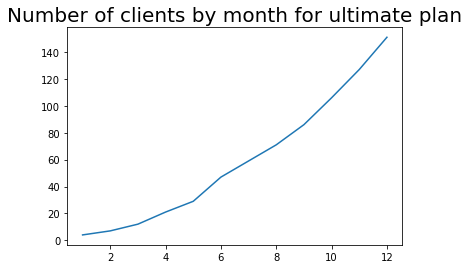

In [38]:
xa = monthly_users_ultimate['month']
ya = monthly_users_ultimate['user_id']
plt.title('Number of clients by month for ultimate plan',fontsize=20)
plt.plot(xa, ya)
plt.show()

More people subscribed through the year to the ultimate plan also, the rise in the users counts is half of the rise that we saw in the surf plan. But still! It's really impressive. 

This could means that the plan became more and more popular. But not more that the surf plan. We finish the year with aprox. 140 clientes using the ultimate plan and aprox. 300 using the surf plan.

But still, we are calculating here the means of the columns : total gigabytes, total messages, total minutes and total_cost.This means that we have more clients, that spends more and and more minutes,internet and messenges through the year in the ultimate plan, but! they don't pay more that the monthly_charge per month, and if they do is just a few dollars extra, nothing critical.


### Calculating the mean, dispersion, and standard deviation.
**Note** : We use the data_revenues table. We created this table to organise all our important values. These table incluides the **sums** of the total calls,total minutes,total mb_used,total gigabytes,total messages and total_cost for each user_id in each month. 

#### Surf plan

In [39]:
#show statistic summary for surf
display(data_revenues.query('plan == "surf"').describe(),'variance: ',
data_revenues.query('plan == "surf"').var())

<ipython-input-39-8d391050a83d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_revenues.query('plan == "surf"').var())


,user_id,month,total calls,total minutes,total mb_used,total gigabytes,total messages,total_cost
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,59.811825,428.749523,16558.283490,17.037508,31.159568,82.099046
std,139.227939,2.468199,32.017989,234.453150,8013.513327,8.016395,33.566717,75.214553
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,8.000000,39.000000,272.000000,11986.520000,12.000000,3.000000,20.000000
50%,1245.000000,10.000000,60.000000,425.000000,16829.310000,17.000000,24.000000,60.000000
75%,1358.000000,11.000000,79.000000,576.000000,20999.610000,21.000000,47.000000,110.000000
max,1499.000000,12.000000,205.000000,1510.000000,70931.590000,71.000000,266.000000,783.700000


'variance: '

user_id            1.938442e+04
month              6.092007e+00
total calls        1.025152e+03
total minutes      5.496828e+04
total mb_used      6.421640e+07
total gigabytes    6.426259e+01
total messages     1.126725e+03
total_cost         5.657229e+03
dtype: float64

#### Ultimate plan

In [40]:
#show statistic summary for ultimate
display(data_revenues.query('plan == "ultimate"').describe(), 'variance:',
data_revenues.query('plan == "ultimate"').var())

<ipython-input-40-0c5375d8b989>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_revenues.query('plan == "ultimate"').var())


,user_id,month,total calls,total minutes,total mb_used,total gigabytes,total messages,total_cost
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,60.626389,430.450000,17214.699694,17.719444,37.551389,72.702778
std,150.915644,2.558495,33.242994,240.508762,7851.897435,7.865289,34.767179,12.673080
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,8.000000,36.000000,260.000000,12666.955000,13.000000,7.000000,70.000000
50%,1241.500000,10.000000,61.000000,424.000000,16858.340000,17.000000,30.000000,70.000000
75%,1401.000000,11.000000,80.000000,565.250000,21014.527500,22.000000,61.000000,70.000000
max,1497.000000,12.000000,191.000000,1369.000000,46595.330000,47.000000,166.000000,189.000000


'variance:'

user_id            2.277553e+04
month              6.545895e+00
total calls        1.105097e+03
total minutes      5.784446e+04
total mb_used      6.165229e+07
total gigabytes    6.186276e+01
total messages     1.208757e+03
total_cost         1.606069e+02
dtype: float64

Let's write down the variance for the total cost, we will maybe need this values later:
* variance by plan for surf total minutes : 5.496828e+04
* variance by plan ultimate for total minutes : 5.784446e+04

Let's write down the mean for the total cost for each plan, we will maybe need this values later:
* mean by plan for surf total cost : 82.099046
* mean by plan ultimate for total cost : 72.702778

We see that the differences between the means is not small , it's about approx. 10! Instead, all the means values for the rest of the columns are really similars for the two plans. Interesting! 

# Now it's time for some data visualization

**Note** : We will use the data_revenues table, since we are looking to compare the data using all the sums of the values for the different behaviors (This is important! we are not using the mean of the different behaviors : total minutes, messages and data; we are using each behavior total and the total cost for each customer grouped by month and plan)

### Plotting graphs that will help us to understand the data

First, let's make some bar graphs to understand the numbers that we have. The bars graphs shows the values of the diferentes totals for each month by each plan. 

In [41]:
#creat a pivot table grouped by plan and months and calculating the sum of the values
total_per_month_plan = data_revenues.pivot_table(index = ['plan','month'], values = ['total minutes','total messages','total gigabytes','total_cost'], aggfunc='sum')
total_per_month_plan.reset_index(inplace=True)

#Changing the names of our columns to make the work with them easier in the continue
total_per_month_plan.columns = ["plan","month","total_gigabytes","total_messages","total_minutes","total_cost"]

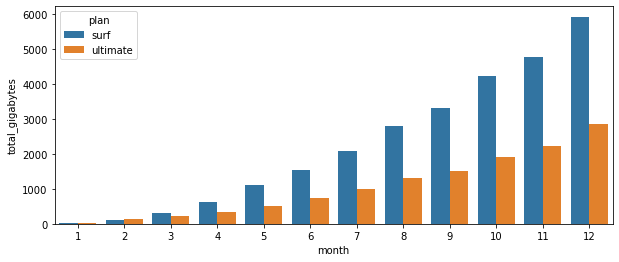

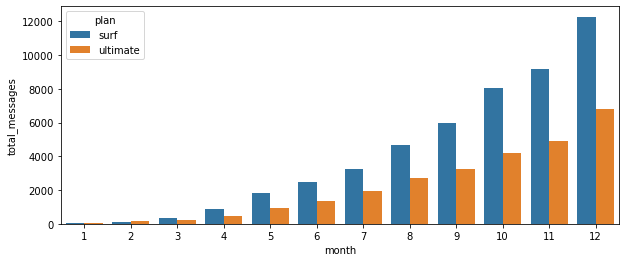

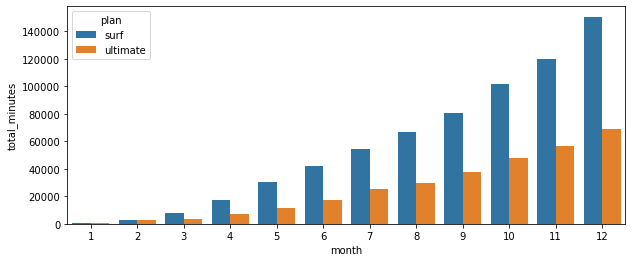

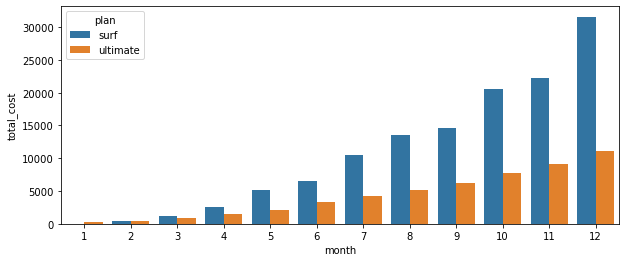

In [42]:
features = ["total_gigabytes","total_messages","total_minutes","total_cost"]
for feature in features:
    fig, ax = plt.subplots(figsize=(10,4))
    x = sns.barplot(x = total_per_month_plan.month, y = total_per_month_plan[feature], hue = total_per_month_plan.plan)
    plt.show()   

The surf plan values for calls minutes, data and messanges acroos the year were always higher than the values of the ultimate plan. Also the total cost!. Good to know! Just don't forget that the numbers of users using the surf plan are bigger.

### Creating histograms with a density scale

Let's plot histograms with a density scale for the distribution of the calls minutes, data and messages!

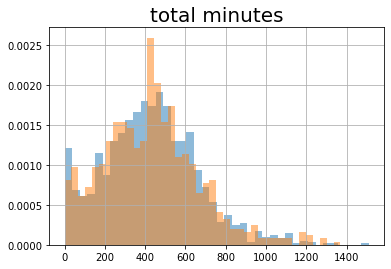

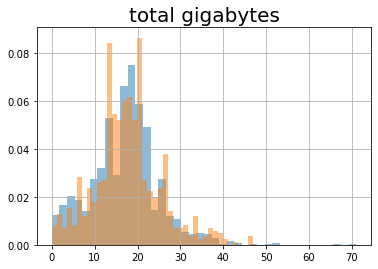

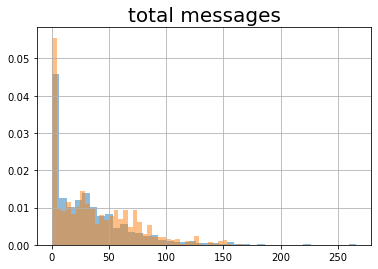

In [43]:
#Changing the names of the columns to make the work with them easier
data_revenues.columns = ['user_id','month','total_calls','total_minutes','total_mb_used','total_gigabytes','total_messages','plan','total_cost']

for x in ['total_minutes','total_gigabytes','total_messages']:
    h1 = data_revenues.query('plan == "surf"')[x].hist(density=True, bins=40, alpha=0.5) 
    h2 = data_revenues.query('plan == "ultimate"')[x].hist(density=True, bins=40, alpha=0.5)
    plt.title(x.replace('_', ' '),fontsize=20)
    plt.show()

There is a lot of outliers! 

### Removing outliers and ploting histograms for distribution again

In [44]:
#First lets slices the data by plan!
data_revenues_surf = data_revenues.query('plan == "surf"')
data_revenues_ultimate = data_revenues.query('plan == "ultimate"')

In [45]:
#clear data based on the IQR method
columns=["total_gigabytes","total_messages","total_minutes"]

for x in columns:
    Q1 = data_revenues_surf[x].quantile(0.25)
    Q3 = data_revenues_surf[x].quantile(0.75)
    IQR = Q3 - Q1       
    #filter out the outliers
    clear_data_surf = data_revenues_surf[~((data_revenues_surf[x] < (Q1 - 1.5 * IQR)) |(data_revenues_surf[x] > (Q3 + 1.5 * IQR)))]
 
#Take a look!
display(clear_data_surf.head())

for x in columns:
    Q1 = data_revenues_ultimate[x].quantile(0.25)
    Q3 = data_revenues_ultimate[x].quantile(0.75)
    IQR = Q3 - Q1       
    #filter out the outliers
    clear_data_ultimate = data_revenues_ultimate[~((data_revenues_ultimate[x] < (Q1 - 1.5 * IQR)) |(data_revenues_ultimate[x] > (Q3 + 1.5 * IQR)))]
 
#Take a look!
display(clear_data_ultimate.head())

,user_id,month,total_calls,total_minutes,total_mb_used,total_gigabytes,total_messages,plan,total_cost
1,1001,8,27.0,182.0,6919.15,7,30,surf,20.0
2,1001,9,49.0,315.0,13314.82,14,44,surf,20.0
3,1001,10,65.0,393.0,22330.49,23,53,surf,100.9
4,1001,11,64.0,426.0,18504.30,19,36,surf,60.0
5,1001,12,56.0,412.0,19369.18,20,44,surf,70.0


,user_id,month,total_calls,total_minutes,total_mb_used,total_gigabytes,total_messages,plan,total_cost
0,1000,12,16.0,124.0,1901.47,2,11,ultimate,70.0
19,1006,11,2.0,10.0,2068.37,3,15,ultimate,70.0
20,1006,12,9.0,59.0,32118.82,33,139,ultimate,91.0
26,1008,10,71.0,476.0,17106.99,18,21,ultimate,70.0
27,1008,11,63.0,446.0,23676.72,24,37,ultimate,70.0


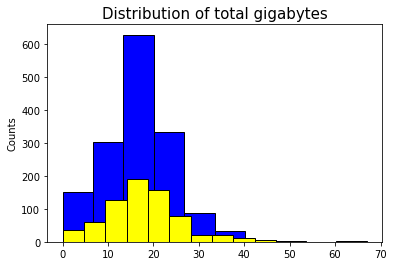

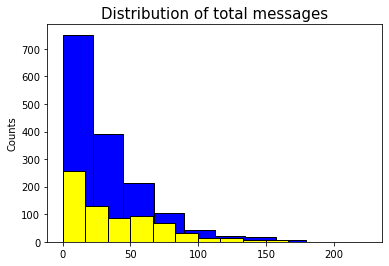

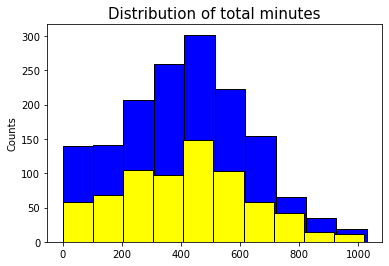

In [46]:
columns=["total_gigabytes","total_messages","total_minutes"]

for x in columns:
    # matplotlib histogram for surf plan
    plt.hist(clear_data_surf[x], color = 'blue', edgecolor = 'black', bins =10)        
    # matplotlib histogram for ultimate plan
    plt.hist(clear_data_ultimate[x], color = 'yellow', edgecolor = 'black', bins = 10)         
   # Add labels
    plt.title('Distribution of {}'.format(x.replace('_', ' ')),fontsize=15)
    plt.ylabel('Counts') 
   #plot the histograms 
    plt.show()

We can see that the distribution of customer consumption for call duration, messaging and data is very similar in both plans, indicating that customers do not overuse even when they receive a package that is almost "unlimited" and their consumption is very similar to those with a limited package.

We can maybe concluded that since customer consumption is similar in both plans, customers in the ultimate plan put more money into the company because they hardly use the resources allocated by the company. They consume almost the same as in the surf plan and the monthly charge of the ultimate plan is more than 3 times the monthly charge of the surf plan.

But! 
1. Lets look at the averages for total_count values grouped by months and plans.Most pay attention that for half a year the average total_cost per month is heighter that 80 for the sorf plan! Even more that the monthly charge for the ultimate plan. Also! for 11 monts the clientes of the surf plan pay in average more that the monthly charge (20). Insted, the clientes of the ultimate plan pages aprox. 70 per month (the monthly charge). 
2. When we compared before the total average for total cost for each plan we saw thet the mean for surf total cost is 82.099046, while the mean for plan ultimate total cost is 72.702778 (Although that for all the rest of the columns the mean values are really similar for both plans)

So, after taking in consideration all the information that we collected we can maybe conclude that since customer consumption is similar in both plans, customers in the surf plan put more money into the company because they use more resources allocated by their monthly plan (paying entra money for this). They consume is almost the same as the consumer consume of the ultimate plan clients, and they paid through the year an average of 10 dollars more that the ultimate plan clients.

Taking all these considerations let's test our hypothesis.

# Testing the hypotheses

Will test the next hypotheses:
1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

Our alpha will be 0.5

And we will explain:
1. How we formulated the null and alternative hypotheses.
2. What criterion we used to test the hypotheses and why.

**Note** : We will use the data_revenues table, since we are looking to compare the data using all the sums of the values for the different behaviors (This is important! we are not using the mean of the different behaviors : total minutes, messages and data; we are using each behavior total and the total cost for each customer grouped by month and plan)

### Hipothesis 1: 
### The average revenue from users of Ultimate and Surf calling plans differs

H0: The average revenue from users of Ultimate and Surf calling plans are equal.

H1: The average revenue from users of Ultimate and Surf calling plans are not equal.

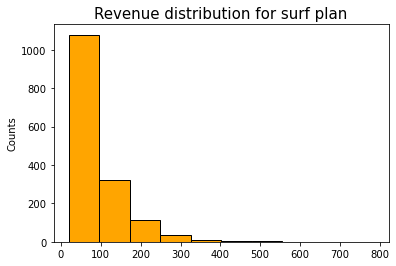

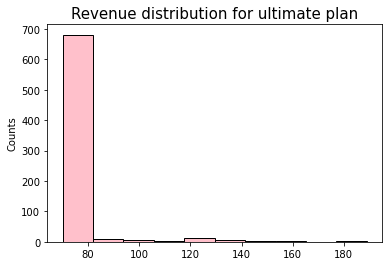

In [47]:
# matplotlib histogram for surf plan
plt.hist(data_revenues_surf['total_cost'], color = 'orange', edgecolor = 'black', bins =10)        
plt.title('Revenue distribution for surf plan',fontsize=15)
plt.ylabel('Counts') 
#plot the histograms 
plt.show()

# matplotlib histogram for ultimate plan
plt.hist(data_revenues_ultimate['total_cost'], color = 'pink', edgecolor = 'black', bins = 10)         
# Add labels
plt.title('Revenue distribution for ultimate plan',fontsize=15)
plt.ylabel('Counts') 
#plot the histograms 
plt.show()

The distribution of our data is not normal. But there is no reason to panic! <br>

The Central Limit Theorem (CLT) is an almost miraculous statistical property enabling us to test the statistical significance of a statistic such as the mean. In essence, the CLT states that as long as we have a large enough sample, the t-statistic (applied, e.g., to test whether the mean is equal to a particular value) is approximately standard normal distributed. This holds independently of how the underlying data is distributed.

Let's check the sizes of our samples!

In [48]:
#sample size for ultimate plan
len(data_revenues[data_revenues['plan']=="ultimate"])

720

In [49]:
#sample size for surf plan
len(data_revenues[data_revenues['plan']=="surf"])

1573

Perfect! Our samples are big enough. So thanks to the CLT, we can process to use t T-test! (even if the distribution of our data is not normal).

We are doing a two-tailed T-test for independent samples - samples which are independent of each other. The two-tailed test is a method in which the critical area of a distribution is two-sided and tests whether a sample is greater or less than a range of values (exactly what we are looking for!). 

In order to test our hypothesis that the means of the two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind(array1, array2, equal_var).

equal_var (from equal variance) is a parameter that specifies whether or not the variances of the populations should be considered equal. We will calculate variance of each group and compare them. If the difference is less than 5%, it means the variances can be considered as equal ones. If the difference is higher, when the variances can be considered as different ones.

In [50]:
#Making a list of values for the variance calculation, for the ultimate sample
ultimate_list_revenue = data_revenues[data_revenues['plan']=="ultimate"]['total_cost']. tolist() 

In [51]:
#Making a list of values for the variance calculation, for the surf sample
surf_list_revenue = data_revenues[data_revenues['plan']=="surf"]['total_cost']. tolist() 

In [52]:
#variance of surf sample
variance_surf = np.var(surf_list_revenue)
print(variance_surf) 

5653.632529287738


In [53]:
##variance of surf ultimate
variance_ultimate = np.var(ultimate_list_revenue)
print(variance_ultimate) 

160.3838811728395


In [54]:
print('The difference beteween the variances is about ' ,((variance_surf/variance_ultimate)-1)*100  ,'%')

The difference beteween the variances is about  3425.0627980470413 %


Okay! Obviously we are using equal_var = False.

#### Now is time to use the T-Test!

In [55]:
 # define the two independent samples
ultimate = data_revenues_ultimate['total_cost']
surf = data_revenues_surf['total_cost']

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(ultimate, surf, equal_var = False )

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.6555704694059543e-06
We reject the null hypothesis


The p-value obtained is almost zero! 

This means the null hypothesis can be easily rejected - The samples average revenue Ultimate and Surf calling plans are not equal and the statistical probability of these population means being equals is really low - almost 0!.

This means that we can conclude that the average revenue for the ultimate and surf plan is different for all the statistical population - all the customers using these plans in our company.

We reject the null hypothesis and we can assume there is enough evidence to support the alternative hypothesis.  

### Hipothesis 2: 
### The average revenue from users in NY-NJ area is different from that of the users from other regions.

H0 : The average revenue from users in NY-NJ area equals the average revenue of the users from other regions.

H1: The average revenue from users in NY-NJ  is not equal to the average revenue of the users from other regions.

#### First we will slice the data of the users using this area division : we are determining the two populations.

In [56]:
#Definition of the two populations (two groups: NY-NJ, rest) by total cost
data_ny_nj=data_users.loc[data_users['city'].str.contains("NY|NJ", case=False)]
data_for_rest=data_users[~data_users['city'].str.contains('NY|NJ')]

#using reset_index() in the tables
data_ny_nj.reset_index(inplace=True)
data_for_rest.reset_index(inplace=True)

In [57]:
#Let's look if everthing looks good for the data_ny_nj table!
print('NY-NJ area')
print('rows/user_id in data_ny_nj:',len(data_ny_nj))
display(data_ny_nj.head())

#Extra empty line
print()

#Let's look if everthing looks good for the data_for_rest table!
print('All the rest')
print('rows/user_id in data_for_rest:',len(data_for_rest))
display(data_for_rest.head())

NY-NJ area
rows/user_id in data_ny_nj: 108


,index,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN
1,14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaN
2,22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
3,24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
4,27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN



All the rest
rows/user_id in data_for_rest: 397


,index,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


We can see the term NJ also contains the city of "San Jose", so we will create another command to remove this city for the data_ny_nj table. 

In [58]:
#Creating another command to remove "San Jose" this city
data_ny_nj = data_ny_nj[~data_ny_nj['city'].str.contains('San Jose')]
#using reset_index() in the tables
data_ny_nj.reset_index(inplace=True)

In [59]:
#Let's look if everthing looks good!
print('NY-NJ area')
print('rows/user_id in data_ny_nj:',len(data_ny_nj))
display(data_ny_nj.head())

NY-NJ area
rows/user_id in data_ny_nj: 103


,level_0,index,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1,14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaN
1,2,22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
2,3,24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
3,4,27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
4,5,28,1028,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,NaN


#####  Merging the tables data_revenues and data_ny_nj.

A left join of these two tables will return only the rows in which the left table (data_revenues) have matching keys (user_id) in the right table (data_ny_nj) using only keys from right table.

In [72]:
# merging the tables with the merge() method
data_revenues_ny_nj = pd.merge(left = data_ny_nj, right = data_revenues, how='inner',on=['user_id'])

#Let's look if everthing looks good!
print('rows/user_id in data_ny_nj:',len(data_ny_nj))
display(data_revenues_ny_nj.tail(2))

rows/user_id in data_ny_nj: 103


,level_0,index,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,month,total_calls,total_minutes,total_mb_used,total_gigabytes,total_messages,plan_y,total_cost
486,107,498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,11,41.0,223.0,19168.55,20,0,surf,70.0
487,107,498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,12,39.0,339.0,23137.69,24,0,surf,110.0


We have the same numbers of users (103)! We didn't lose information with the merge. It's always good to check!

#####  Merging the tables data_revenues and data_ny_nj.

In [73]:
# merging the tables with the merge() method
data_revenues_rest = pd.merge(left = data_for_rest, right = data_revenues, how='inner',on=['user_id'])

#Let's look if everthing looks good!
print('rows/user_id in data_for_rest:',len(data_for_rest))
display(data_revenues_rest.tail(2))

rows/user_id in data_for_rest: 397


,index,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,month,total_calls,total_minutes,total_mb_used,total_gigabytes,total_messages,plan_y,total_cost
1803,499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,11,45.0,308.0,16813.83,17,0,surf,40.0
1804,499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,12,65.0,496.0,22059.21,23,0,surf,100.0


We have the same numbers of users (397) ! We didn't lose information with the merge. It's always good to check!

Let's take a look at the renueve distribution of the this two samples.

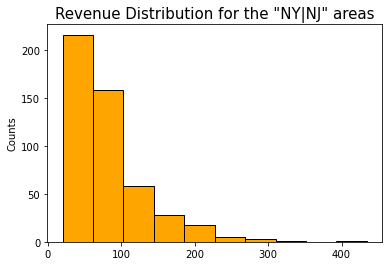

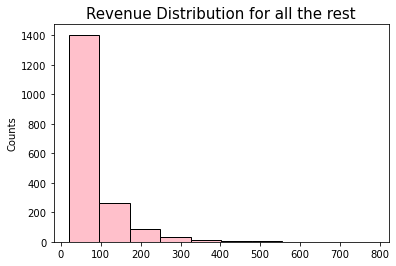

In [62]:
# matplotlib histogram for surf plan
plt.hist(data_revenues_ny_nj['total_cost'], color = 'orange', edgecolor = 'black', bins =10)        
plt.title('Revenue Distribution for the "NY|NJ" areas',fontsize=15)
plt.ylabel('Counts') 
#plot the histograms 
plt.show()

# matplotlib histogram for ultimate plan
plt.hist(data_revenues_rest['total_cost'], color = 'pink', edgecolor = 'black', bins = 10)         
# Add labels
plt.title('Revenue Distribution for all the rest',fontsize=15)
plt.ylabel('Counts') 
#plot the histograms 
plt.show()

The distribution of our data is not normal. But there is no reason to panic! <br>

Let's check the sizes of our samples!

In [63]:
#sample size for users in NY-NJ area 
len(data_revenues_ny_nj)

488

In [64]:
#Sample size for users in all other areas.
len(data_revenues_rest)

1805

Perfect! Our samples are big enough. So thanks to the CLT, we can process to use t T-test! (even if the distribution of our data is not normal).

We are doing a two-tailed T-test for independent samples - samples which are independent of each other.

In order to test our hypothesis that the means of the two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind(array1, array2, equal_var).

Now we need to check what we want to do with the equal_var (from equal variance) parameter  - that specifies whether or not the variances of the populations should be considered equal. Like we did before, we will calculate variance of each group and compare them. If the difference is less than 5%, it means the variances can be considered as equal ones. If the difference is higher, when the variances can be considered as different ones.

In [65]:
#Making a list of values for the variance calculation, for the NY-NJ sample
data_revenues_ny_nj_list_revenue = data_revenues_ny_nj['total_cost']. tolist() 

In [66]:
#Making a list of values for the variance calculation, for all others areas sample
data_revenues_other_areas_list_revenue =  data_revenues_rest['total_cost']. tolist() 

We will use the np.nanvar method, how it calculates the variance along the specified axis, ignoring the NaNs.

In [67]:
#variance of _ny_nj sample
variance_ny_nj = np.nanvar(data_revenues_ny_nj_list_revenue)
print(variance_ny_nj) 

3355.052450786079


In [68]:
#variance of rest areas sample
variance_other_areas = np.nanvar(data_revenues_other_areas_list_revenue)
print(variance_other_areas) 

4102.79584415712


In [69]:
print('The difference beteween the variances is about ' ,((variance_other_areas/variance_ny_nj)-1)*100  ,'%')

The difference beteween the variances is about  22.287085055729804 %


The the difference is high! The variances can be considered as different ones! We are using equal_var = False.

#### Now is time to use the T-Test!

In [70]:
# define the two independent samples
ny_nj = data_revenues_ny_nj_list_revenue
rest = data_revenues_other_areas_list_revenue

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(ny_nj, rest, equal_var = False )

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  0.10194453874284388
We can't reject the null hypothesis


The p-value would  low enough to reject the null hypothesis in favor of the alternative.

We reject the hypothesis that the average revenue from users in NY-NJ area is equal from that of the users from other regions.

We can conclude that there are regions in the country were the average renueve is greater or smaller.

# Overall conclusion

First! We will recomence to the company to detecte in wich regions the average renueve is lowest and invest to improve the numbers in these specific regions.

And what more?
We can conclude that the surf plan brings more clients and the average renueve from these users is grather that 82 per year. 

The plan surf users also use minutes, mesages and data in much the same way as (and these users average renueve is 72 per year)

Now it's depende in the ways the company wants to manage his clientes. Let's explains the options!
1. The surf plan obviously makes more money for the company that the ultimate plan, because almost all the surf plan users exceed their monthly calls, messages and data volume. And in the end the average renueve of these clients is higher than the average renueve of the ultimate plan clients (while they spend in average the same minutes calls, data volume and messages). So, if the company wants to continue to make money from these clients (and also make money fron new clients) we recomende to patrocinate the surf plan. In this way the company will make good money from users that choose a cheep plan, but in the end they exceed their monthly calls, messages and data volume and pay extra money for that.
2. The company can decide to explain to all the surf plan users why is convenient for them to move to the ultimate plan, and in this way these clients will save money. 